In [135]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [136]:
fishdf = pd.read_csv("Fish.csv")

In [137]:
fishdf.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [138]:
fish1 = fishdf.drop(labels='Species', axis=1)

In [139]:
fish1.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [140]:
fish1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [141]:
corr = fish1.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


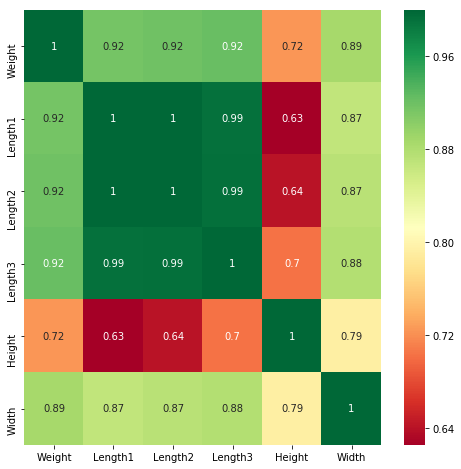

In [142]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

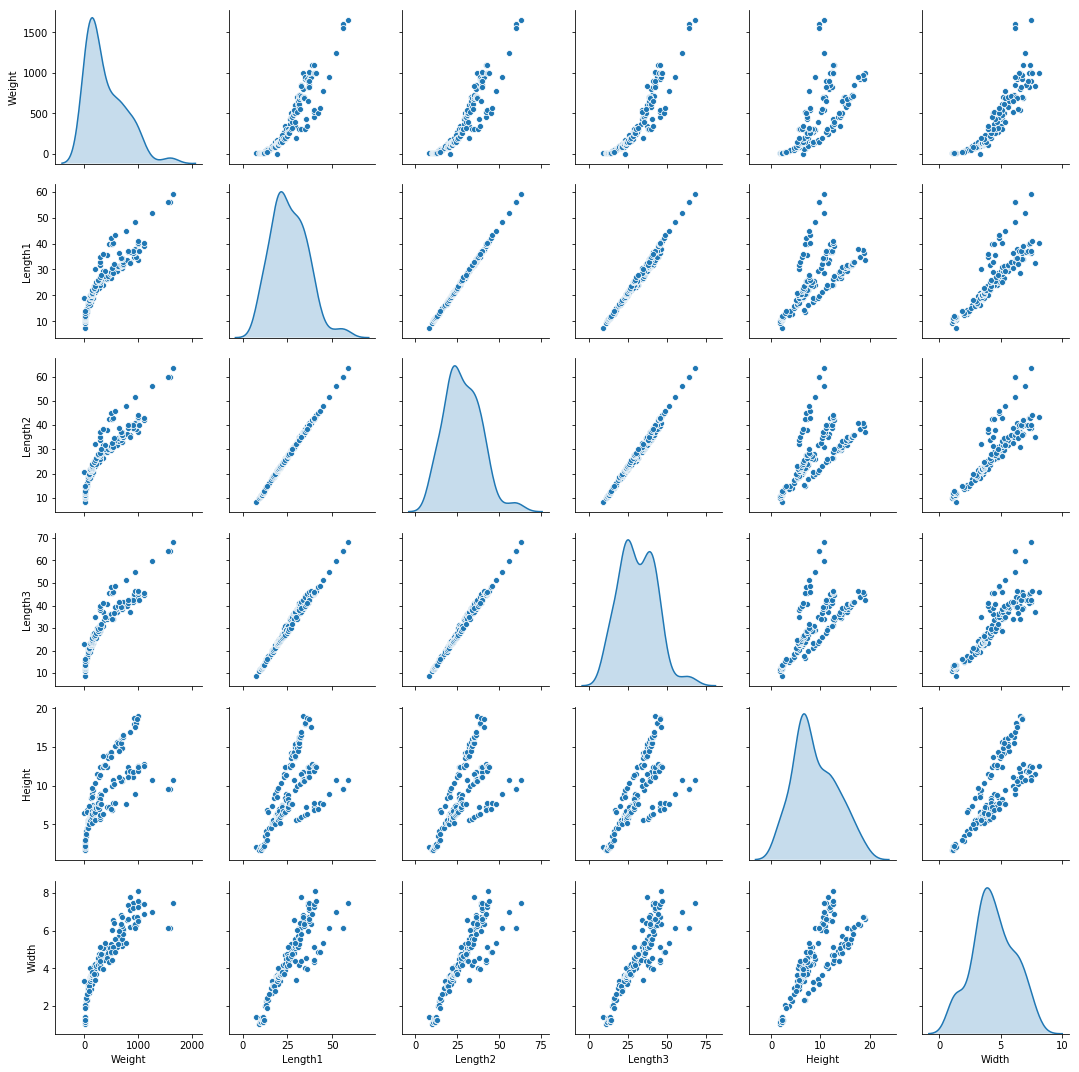

In [175]:
sns.pairplot(fish1, diag_kind ="kde")

In [143]:
y = fish1['Weight']
x = fish1.drop(labels='Weight', axis=1)

In [144]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=999)

In [145]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(119, 5)
(119,)
(40, 5)
(40,)


In [146]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [147]:
reg=lm.fit(train_x, train_y)

In [148]:
predicted_y = lm.predict(test_x)

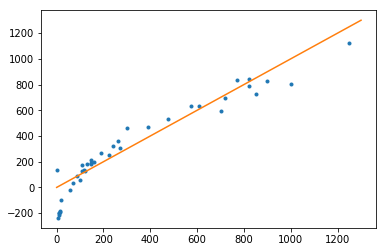

In [149]:
plt.plot(test_y, predicted_y, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 1300, 100)
y = x
plt.plot(x, y)
plt.show()

In [150]:
from sklearn import metrics as mt
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))

1) The model explains, 89.6 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 87.82
3) The R-Square score of the model is  0.89


In [151]:
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

Length1    30.838091
Length2    15.177815
Length3   -21.555695
Height     22.332560
Width      37.497463
dtype: float64


Intercept:

-541.2011396240875




In [152]:
print('\nCoefficient of model :', lm.coef_)

# intercept of the model
print('\nIntercept of model',lm.intercept_)


Coefficient of model : [ 30.83809054  15.17781544 -21.55569459  22.33256027  37.49746298]

Intercept of model -541.2011396240875


In [153]:
predict_train = lm.predict(train_x)
print(predict_train)

[ 883.05239969  796.04951015  476.59962031  187.44687814  561.49900216
  160.87873914 1161.61339492  420.99103883   82.40408522  849.27540762
  673.01712408  124.5483026   350.29115222 -110.90344608  -56.26583144
  171.54428843  880.97747426  258.22684912   60.25270448  976.00216327
  953.30300142  167.13833653  520.72828022  168.99911454  627.03858382
 -100.9229862   914.21032391  720.99528779  799.06693632  737.11729298
 -214.11770146  651.03848729  656.73181179  380.17903234  924.80434604
  138.88515701 -235.96236335  219.41897057  603.26288674  166.29613677
  706.06051864  824.89928745  237.6320786    86.50893818  313.84270819
  507.8332188   356.54849529 -103.07040673   -2.26874484  953.94705418
  295.51798312  272.38187938  811.15219976  130.24986032  813.61049135
  642.72425773  681.2593572   179.88226611  374.97097546  681.38610045
  711.87768587  613.95466422  196.52932998  161.04798511  453.68964658
  506.96423901  227.2622423   577.11889875   21.03109462  330.97021551
  179.

In [154]:
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = lm.predict(test_x)
print(predict_test)

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on train dataset :  125.38519062354472
[ 823.68391022  189.10192458  359.13013926  212.04582578  729.58497577
  182.27374852  838.32931895 -211.40856189  595.74733004  270.93576096
  134.68225187  469.63195209 1126.03073454  321.0991311   629.73225457
   58.88840486  -17.2819369   806.13556863  695.44053218 -237.235955
 -202.85174608  308.98257589  534.71615763  459.04589913  130.63907301
  842.4391959   254.3086277  -198.4307952   791.16885544  181.81417266
 -181.34004373  134.62936099  125.00454482  176.04771688  635.32714135
  197.50979867 -191.29960905   85.45166453   30.41419065 -101.22174514]

RMSE on test dataset :  110.70674438447566


In [158]:
from sklearn.metrics import r2_score 
r2_score(test_y,predicted_y)

0.89097294441222

In [159]:
res = test_y - predicted_y

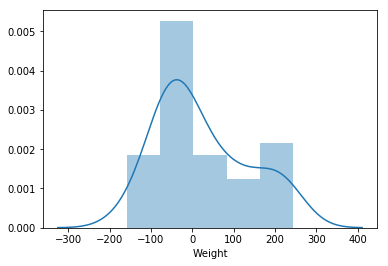

In [160]:
sns.distplot(res)

In [166]:
z=pd.DataFrame({'actual':test_y,'predicted':predicted_y})

In [172]:
z.head()

,actual,predicted
120,900.0,823.683910
93,145.0,189.101925
103,260.0,359.130139
68,145.0,212.045826
28,850.0,729.584976


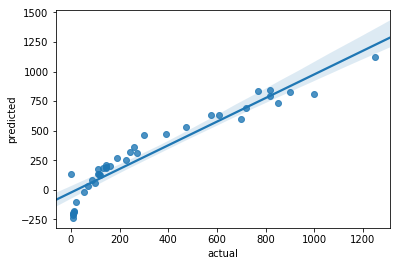

In [173]:
sns.regplot('actual','predicted',data=z)